In [26]:
import numpy as np
from numpy.random import seed
from numpy.random import randint
import matplotlib.pyplot as plt
%matplotlib inline
import sys
import pandas as pd
import wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)
from jupyterthemes import jtplot
# choose which theme to inherit plotting style from
# onedork | grade3 | oceans16 | chesterish | monokai | solarizedl | solarizedd
jtplot.style(theme='solarizedl', context='notebook', ticks=True, grid=False)
from pprint import pprint
import re
import matplotlib.colors as mcolors
from matplotlib.ticker import MaxNLocator
import nltk
import seaborn as sns
from collections import Counter
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/diegoalejandrobermudezsierra/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [27]:
path = '/Users/diegoalejandrobermudezsierra/OneDrive - Universidad de los Andes/BX/OIM/Republica Dominicana/Topico_dominante_por_frase_snippet.xlsx'
base = pd.read_excel(path)

base['Text'] = base['Text'].str.lower()

base.head()

,Unnamed: 0,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,0,1,0.9572,"venezolano, playoffs, liga, equipo, torres, ch...",hader (1-0) ponchó al venezolano luis arráez y...
1,1,1,3,0.9663,"no, haitiano, amenaza, llevar, tener, venezola...","la palabra afro es como el catchu,hay q ponér..."
2,2,2,4,0.9745,"haitiano, no, maldito, dominicano, tener, país...",para los nazionalistas de aquí de twitter ni ...
3,3,3,5,0.7314,"venezolano, haitiano, año, luis, dominicano, f...","de 2020, fueron suspendidos nuevamente a final..."
4,4,4,5,0.7416,"venezolano, haitiano, año, luis, dominicano, f...","de 2020, fueron suspendidos nuevamente a final..."


In [28]:
base['venezolano'] = base.Text.str.findall(r'(veneco|veneca|venezolan|cham)[A-Za-z]*')
base['venezolano'] = base.venezolano.map(lambda x: x!=[])
base['venezolano'] = np.where(base['venezolano'], 1, 0)

base['haitianos'] = base.Text.str.findall(r'(haitian|pity|piti|mesy|pity mesi|pity mesie|pity mesi)[A-Za-z]*')
base['haitianos'] = base.haitianos.map(lambda x: x!=[])
base['haitianos'] = np.where(base['haitianos'], 1, 0)

base['nicaraguenses'] = base.Text.str.findall(r'\Wnica[A-Za-z]*')
base['nicaraguenses'] = base.nicaraguenses.map(lambda x: x!=[])
base['nicaraguenses'] = np.where(base['nicaraguenses'], 1, 0)

base['sd'] = np.where((base['haitianos']==0) & (base['venezolano']==0) & (base['nicaraguenses']==0), 1, 0)

base.head()

,Unnamed: 0,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text,venezolano,haitianos,nicaraguenses,sd
0,0,0,1,0.9572,"venezolano, playoffs, liga, equipo, torres, ch...",hader (1-0) ponchó al venezolano luis arráez y...,1,0,0,0
1,1,1,3,0.9663,"no, haitiano, amenaza, llevar, tener, venezola...","la palabra afro es como el catchu,hay q ponér...",0,1,0,0
2,2,2,4,0.9745,"haitiano, no, maldito, dominicano, tener, país...",para los nazionalistas de aquí de twitter ni ...,0,1,0,0
3,3,3,5,0.7314,"venezolano, haitiano, año, luis, dominicano, f...","de 2020, fueron suspendidos nuevamente a final...",0,0,0,1
4,4,4,5,0.7416,"venezolano, haitiano, año, luis, dominicano, f...","de 2020, fueron suspendidos nuevamente a final...",0,0,0,1


In [21]:
base = base.describe()[['venezolano', 'haitianos', 'nicaraguenses', 'sd']].reset_index()
base = base.loc[base['index'] == 'mean']

base

,index,venezolano,haitianos,nicaraguenses,sd
1,mean,0.165688,0.4858,0.000578,0.351978


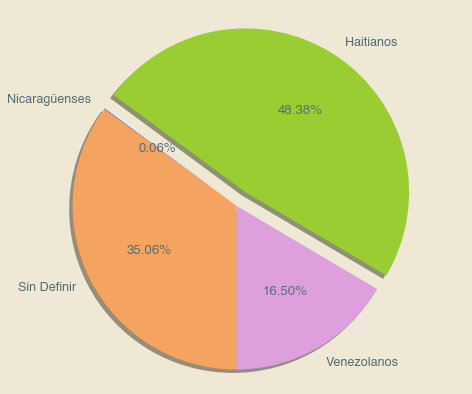

In [22]:
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Venezolanos', 'Haitianos', 'Nicaragüenses', 'Sin Definir'
sizes = list(base.iloc[0, 1:])
explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig, ax = plt.subplots()
ax.pie(sizes, explode=explode, labels=labels, autopct='%1.2f%%',
        shadow=True, startangle=270, colors = ['plum', 'yellowgreen', 'blue', 'sandybrown'])
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

fig.savefig('/Users/diegoalejandrobermudezsierra/OneDrive - Universidad de los Andes/BX/OIM/Republica Dominicana/Nacionalidades.jpeg', bbox_inches='tight')

plt.show()

In [23]:
base = base.T.reset_index(drop=True)
base['Nacionalidad'] = ['Nacionalidad', 'Venezolanos', 'Haitianos', 'Nicaragüenses', 'Sin Definir']

base.columns = ['Volumen (%)', 'Nacionalidad']
base = base.iloc[1:,:]
base['Volumen (%)'] = base['Volumen (%)']*100

base

,Volumen (%),Nacionalidad
1,16.568788,Venezolanos
2,48.579956,Haitianos
3,0.057765,Nicaragüenses
4,35.197843,Sin Definir


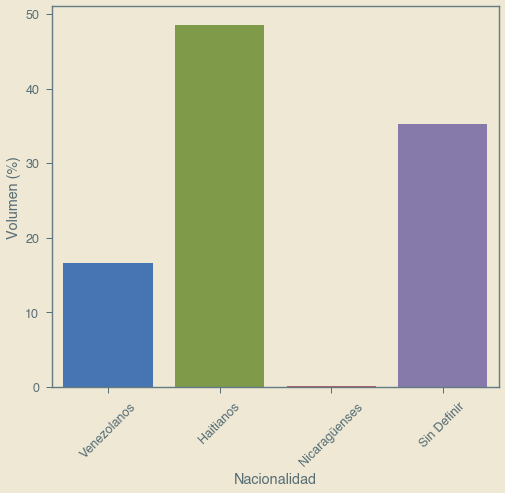

In [24]:
g = sns.barplot(x = 'Nacionalidad', y = 'Volumen (%)', data = base)
for item in g.get_xticklabels():
    item.set_rotation(45)

In [31]:
base[base['sd']==1]['Text']


3        de 2020, fueron suspendidos nuevamente a final...
4        de 2020, fueron suspendidos nuevamente a final...
6        de 2020, fueron suspendidos nuevamente a final...
15         la cárcel es un premio para un hijueputa de ...
16             rt  abel martinez no es patriota,ni le impo
                               ...                        
10377    de apoyo a repatriados y refugiados (garr).\n\...
10378    de apoyo a repatriados y refugiados (garr).\n“...
10379    de apoyo a repatriados y refugiados (garr).\n ...
10384    repudiado comunista… \nfichado por los carcele...
10385    , tomar una decisión de esa naturaleza, está l...
Name: Text, Length: 3656, dtype: object